# required package

In [25]:
library(dplyr)
library (ggplot2)

# to create data

In [32]:
treatment=rep(c("Cultivar A","Cultivar B","Cultivar C","Cultivar D","Cultivar E"), each=3)
rep=rep(c("I","II","III"), time=5)
yield=c(10,11,21,13,23,23,13,13,5,33,21,13,42,12,13)
dataA=data.frame(treatment,rep, yield)
dataA

treatment,rep,yield
<chr>,<chr>,<dbl>
Cultivar A,I,10
Cultivar A,II,11
Cultivar A,III,21
Cultivar B,I,13
Cultivar B,II,23
Cultivar B,III,23
Cultivar C,I,13
Cultivar C,II,13
Cultivar C,III,5


#to summarize data

In [33]:
summary=data.frame(dataA %>%
                   group_by(treatment) %>%
                   dplyr::summarize(across(c(yield),
                         .fns= list(Mean=~mean(., na.rm= TRUE),
                           SD= ~sd(., na.rm= TRUE),
                            n=~length(.),
                           se=~sd(.,na.rm= TRUE) / sqrt(length(.))))))%>%
ungroup()
summary

treatment,yield_Mean,yield_SD,yield_n,yield_se
<chr>,<dbl>,<dbl>,<int>,<dbl>
Cultivar A,14.00000,6.082763,3,3.511885
Cultivar B,19.66667,5.773503,3,3.333333
Cultivar C,10.33333,4.618802,3,2.666667
Cultivar D,22.33333,10.066446,3,5.811865
Cultivar E,22.33333,17.039171,3,9.837570


# to create a graph

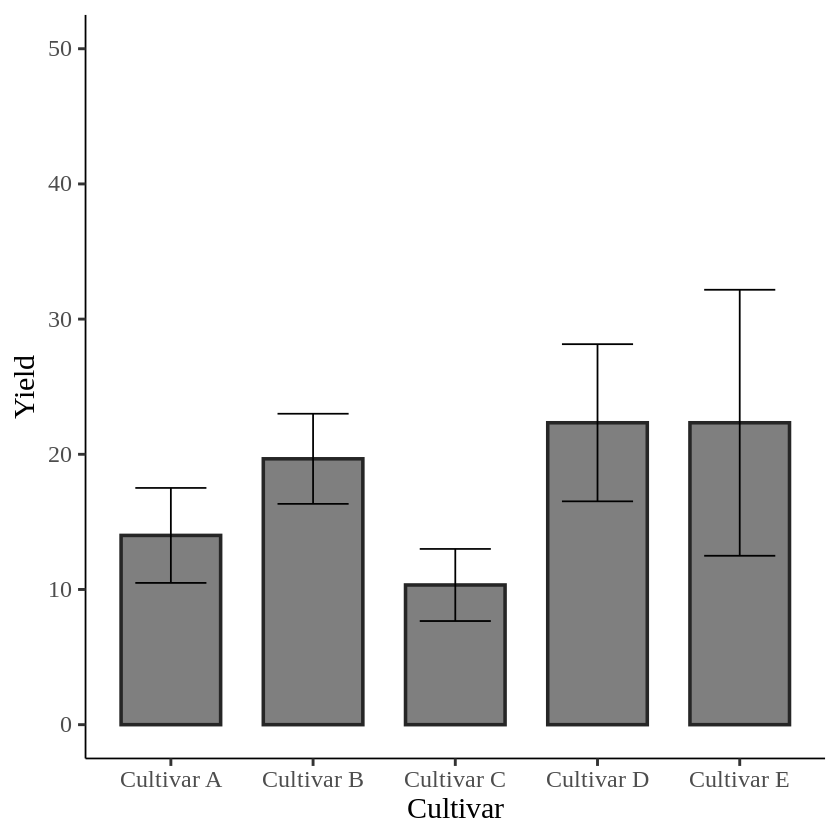

In [29]:
ggplot(data=summary, aes(x=treatment, y=yield_Mean)) +
  geom_bar(stat="identity",position="dodge", width=0.7, size=1, fill="grey50", color="grey15") +
  geom_errorbar(aes(ymin=yield_Mean-yield_se, ymax=yield_Mean+yield_se),
                position=position_dodge(0.9), width=0.5) +
  scale_y_continuous(breaks=seq(0,50,10), limits=c(0,50)) +
  labs(x="Cultivar", y="Yield") +
  theme_classic(base_size=18, base_family="serif") +
  theme(axis.line=element_line(linewidth=0.5, colour="black"))

# to split text into two rows

In [30]:
summary$treatment= as.factor(summary$treatment)
levels(summary$treatment)= gsub(" ", "\n", levels(summary$treatment))

# to create a graph again

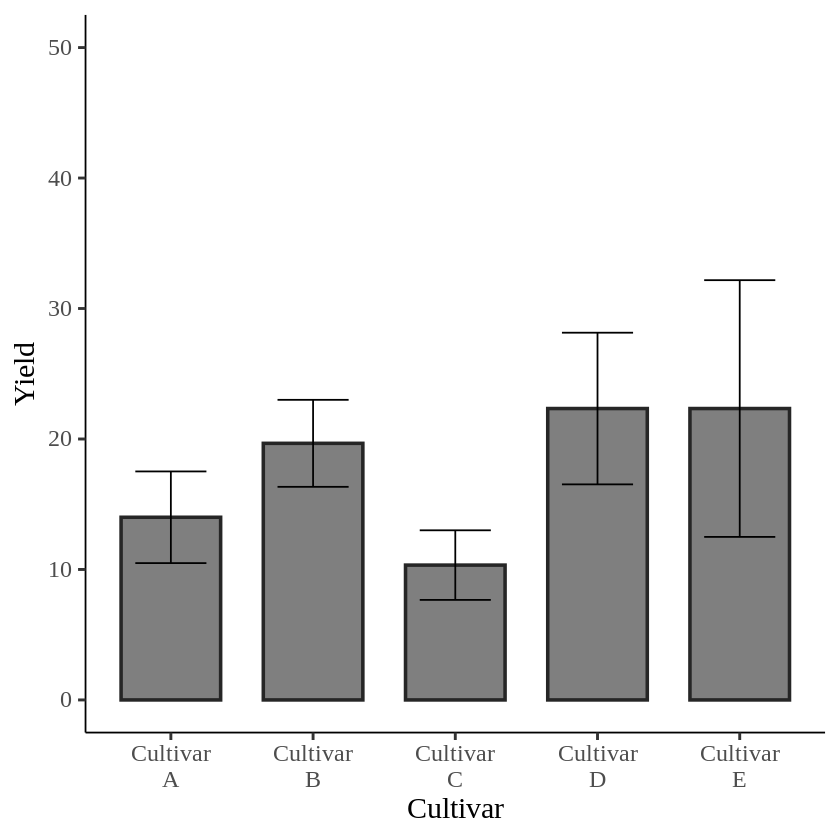

In [31]:
ggplot(data=summary, aes(x=treatment, y=yield_Mean)) +
  geom_bar(stat="identity",position="dodge", width=0.7, size=1, fill="grey50", color="grey15") +
  geom_errorbar(aes(ymin=yield_Mean-yield_se, ymax=yield_Mean+yield_se),
                position=position_dodge(0.9), width=0.5) +
  scale_y_continuous(breaks=seq(0,50,10), limits=c(0,50)) +
  labs(x="Cultivar", y="Yield") +
  theme_classic(base_size=18, base_family="serif") +
  theme(axis.line=element_line(linewidth=0.5, colour="black"))